In [1]:
import torch
import torch.nn as nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
train_dataset = torchvision.datasets.MNIST(
    root="./MNIST/train", train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True)

In [3]:
batch_size = 64

In [4]:
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size)

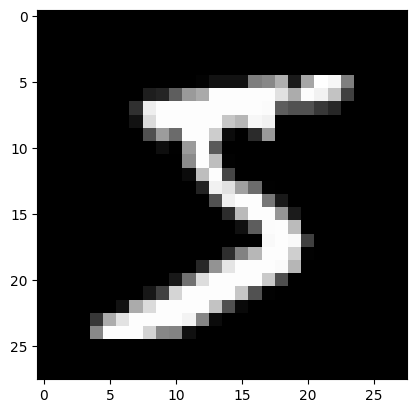

In [5]:
plt.imshow(train_dataset[0][0][0].numpy(), cmap='gray')

In [6]:
train_dataset[0][0][0].shape

torch.Size([28, 28])

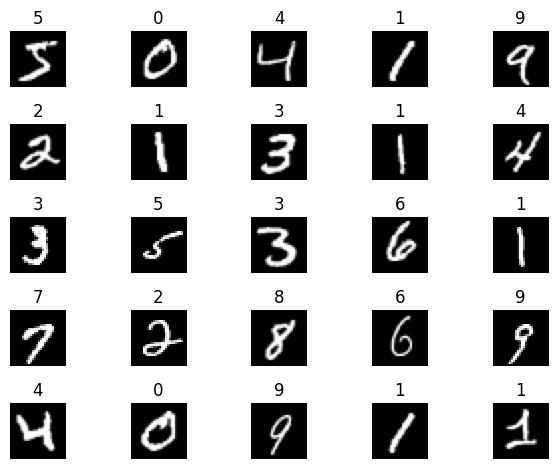

In [7]:
for idx in range(25):
    plt.subplot(5, 5, idx + 1)
    plt.imshow(train_dataset[idx][0][0].numpy(), cmap='gray')
    plt.title(train_dataset[idx][1])
    plt.axis('off')
  
plt.tight_layout()
plt.show()

In [8]:
test_dataset = torchvision.datasets.MNIST(
    root="./MNIST/test", train=False,
    transform=torchvision.transforms.ToTensor(),
    download=True)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=64
)

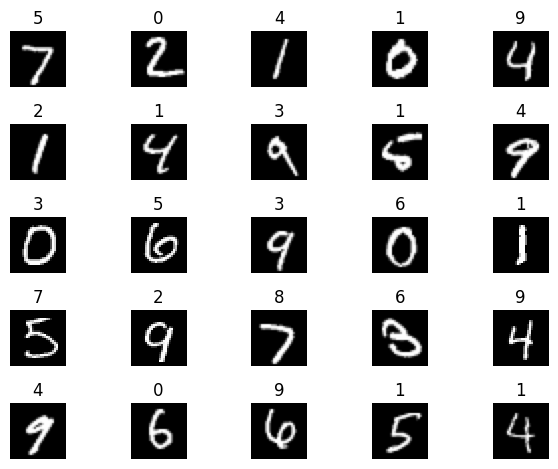

In [9]:
for idx in range(25):
    plt.subplot(5, 5, idx + 1)
    plt.imshow(test_dataset[idx][0][0].numpy(), cmap='gray')
    plt.title(train_dataset[idx][1])
    plt.axis('off')
  
plt.tight_layout()
plt.show()

In [10]:
class MNISTDeepAutoencoder(nn.Module):
    def __init__(self):
        super().__init__()

        # encoder
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

        # decoder
        self.decoder = nn.Sequential(
            nn.Linear(10, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 28*28)
        )

    def forward(self, x):
        return self.decoder(self.encoder(x))

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [55]:
model = MNISTDeepAutoencoder().to(device)
loss = nn.MSELoss()
n_epochs = 50
opt = torch.optim.Adam(model.parameters(), lr=0.001)

In [56]:
train_loss = []
outputs = dict()

for epoch in range(1, n_epochs+1):
    with tqdm(train_loader, unit="batch") as tepoch:

        running_loss = 0

        for imgs_batch, _ in tepoch:
            tepoch.set_description(f"Epoch {epoch}")
            imgs_batch = imgs_batch.reshape(-1, 28*28).to(device)

            # forward pass
            out = model(imgs_batch)

            # loss
            loss_batch = loss(out, imgs_batch)

            opt.zero_grad()
            loss_batch.backward()
            opt.step()

            running_loss += loss_batch.item()
            tepoch.set_postfix(loss=loss_batch.item())
        running_loss /= batch_size
        train_loss.append(running_loss)
    outputs[epoch] = out


Epoch 50: 100%|██████████| 938/938 [00:05<00:00, 173.52batch/s, loss=0.0145]


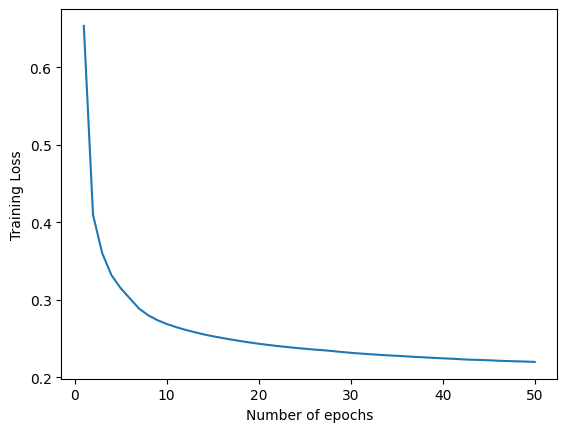

In [57]:
# Plotting the training loss
plt.plot(range(1,n_epochs+1),train_loss)
plt.xlabel("Number of epochs")
plt.ylabel("Training Loss")
plt.show()

ValueError: num must be an integer with 1 <= num <= 21, not 22

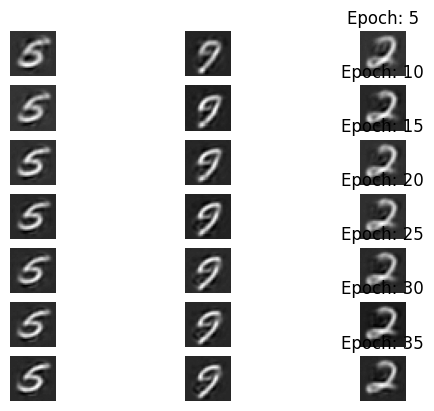

In [60]:
i = 1
for epoch in range(1, n_epochs):
    if epoch % 5 == 0:
        imgs = outputs[epoch].to("cpu").detach().numpy()
        title = f"Epoch: {epoch}"
        for idx in range(3):
            plt.subplot(7,3, i)
            plt.imshow(imgs[idx].reshape(28,28), cmap="gray")
            plt.axis("off")
            i += 1
        plt.title(title)
plt.tight_layout()
plt.show()